In [1]:
import json
import matplotlib
from matplotlib import pyplot as plt
import pickle
import sklearn
import numpy as np
import statistics
%matplotlib inline

In [2]:
oresults_path = '../predicted-results/original/nbins-10'
mresults_path = '../predicted-results/mixed5050/nbins-10'
eresults_path = '../predicted-results/everything/nbins-10'

omodels_path = '../models/original'
mmodels_path = '../models/mixed5050/nbins-10'
emodels_path = '../models/everything/nbins-10'

test_sets = ['5050', '2575', 'everything']

mpoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 'all']
epoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 'all']


In [4]:
omodels = dict()
# 5050 model
for tset in ['5050', '2575', 'everything']:
    omodels[tset] = dict()
    
    '''First load the original models'''
    for target in ['COF', 'intercept']:
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            model = pickle.load(f)
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            features = pickle.load(f)
        with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
            data = json.load(f)
        omodels[tset][target] = {'model': model,
                                 'features': features,
                                 'data': data,
                                 'n_train': len(model.oob_prediction_),
                                 'r_square': data[target]['r_square']}
        


In [11]:
data['intercept']['r_square']

0.6531500247763162

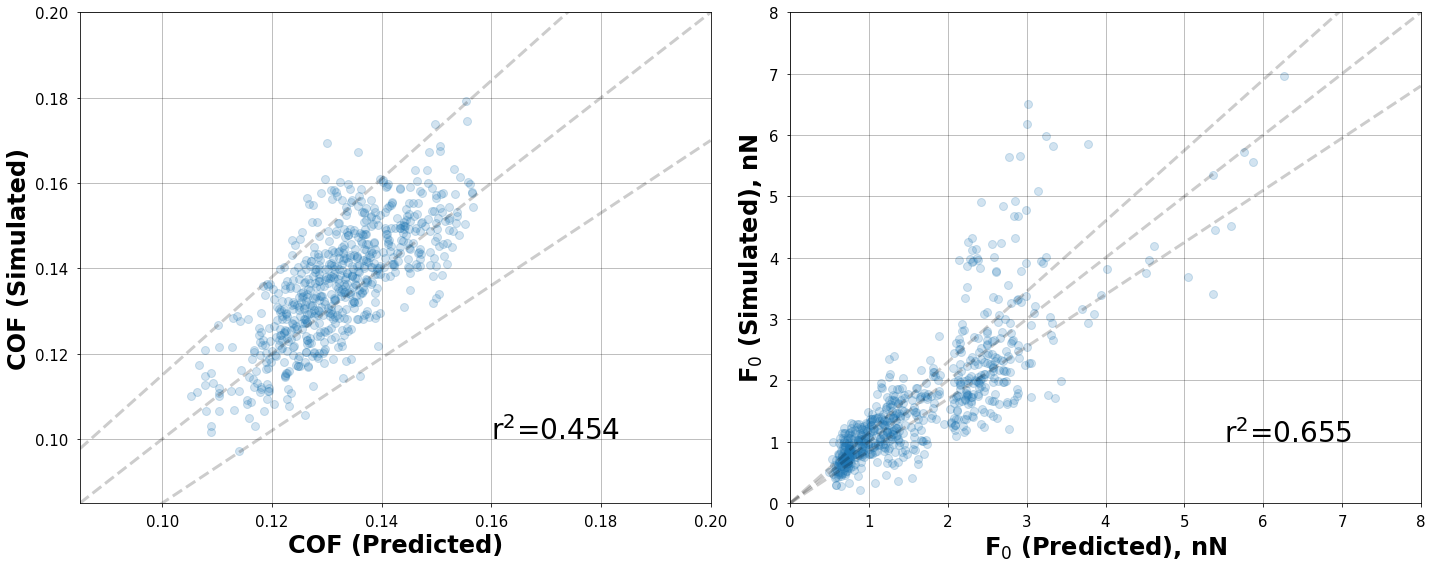

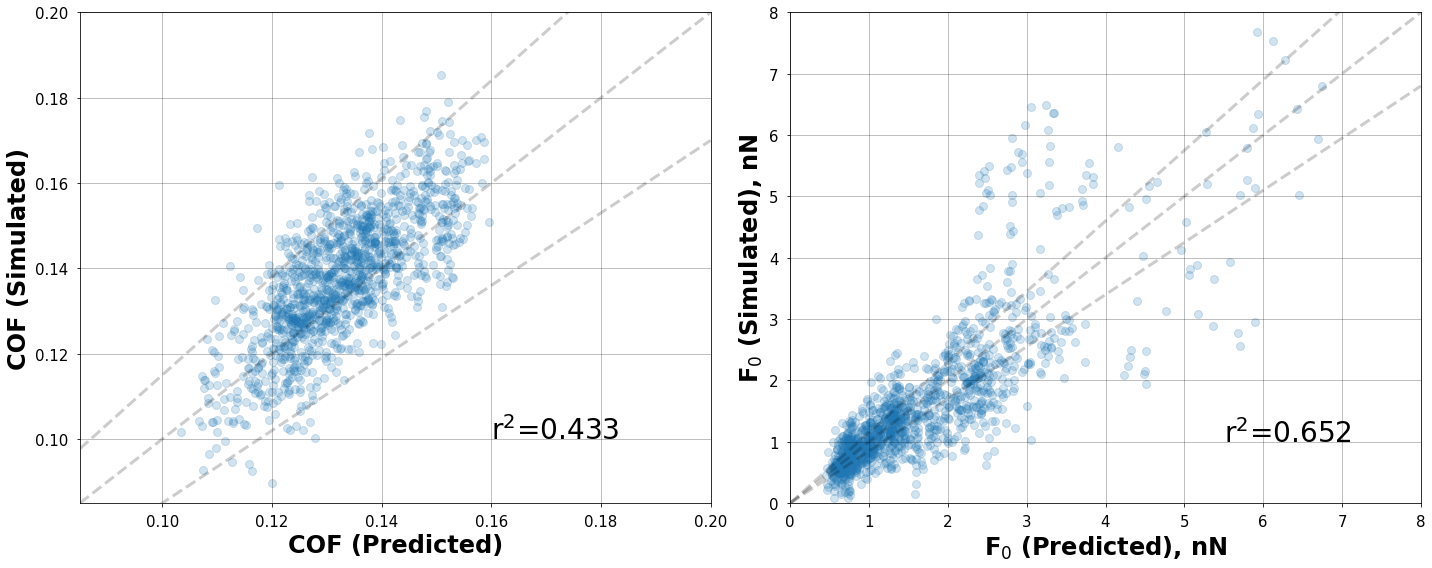

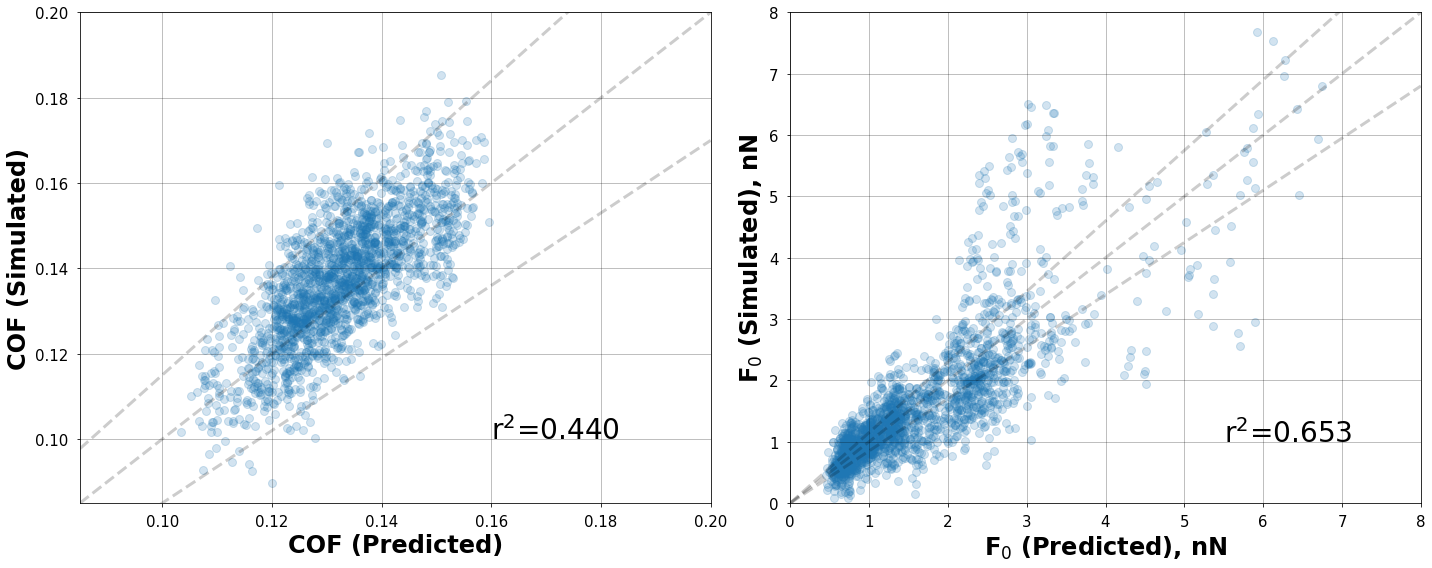

In [13]:
alpha=0.2
for tset in ['5050', '2575', 'everything']:
    plt.figure(figsize=[20, 8])
    for target in ['COF', 'intercept']:
        plt.subplot(1, 2, 1 if target=='COF' else 2)
        sim = list() # x axis
        prd = list() # y axis 
        for j in omodels[tset][target]['data'][target]:
            if j!='r_square':
                sim.append(omodels[tset][target]['data'][target][j][f'simulated-{target}'])
                prd.append(omodels[tset][target]['data'][target][j][f'predicted-{target}'])

        '''
        crr_matrix = np.corrcoef(prd, sim)
        crr_xy = crr_matrix[0, 1]
        r_square = crr_xy**2     
        '''
        u = sum([(prd[a] - sim[a])**2 for a in range(len(prd))])
        v = sum([(sim[a] - statistics.mean(sim))**2 for a in range(len(sim))])
        r_square = 1 - (u/v)
        
        
        if target == 'COF':
            plt.ylim(0.085, 0.2)
            plt.xlim(0.085, 0.2)
            plt.xlabel('COF (Predicted)')
            plt.ylabel('COF (Simulated)')
            plt.text(x=0.16, y=0.1, s=f'r$^2$={r_square:.3f}', fontsize=28)

        else:
            plt.ylim(0, 8)
            plt.xlim(0, 8)
            plt.xlabel('F$_0$ (Predicted), nN')
            plt.ylabel('F$_0$ (Simulated), nN')
            plt.text(x=5.5, y=1, s=f'r$^2$={r_square:.3f}', fontsize=28)

        xpoints = ypoints = plt.xlim()


        plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, alpha=0.2)

        bound_lines = 0.15 
        yuppers = [x*(1+bound_lines) for x in xpoints]
        ylowers = [x*(1-bound_lines) for x in xpoints]
        plt.plot(xpoints, yuppers, linestyle='--',
            color='k', lw=3, scalex=False,
            scaley=False, alpha=0.2)
        plt.plot(xpoints, ylowers, linestyle='--',
            color='k', lw=3, scalex=False,
            scaley=False, alpha=0.2)
        plt.scatter(prd, sim, alpha=alpha, marker='o')


    plot_name = f'original_100_on_{tset}'
    #plt.savefig(fname=f'./plots/avg_pred_vs_sim/{plot_name}.pdf', dpi=500)

In [14]:
plt.close()